## Ensembling (stacking and blending)

We have covered ensemble learning methods i-e Bagging and Boosting in previous lab. Now lets talk about stacking and blending

<b>Blending</b>: Stacking-type ensemble where the meta-model is trained on predictions made on a "holdout dataset"

<b>Stacking</b>: Stacking-type ensemble where the meta-model is trained on predictions made during "k-fold cross-validation"

Two terms you should know before understanding stacking and blending :

<b>Base-Model</b>: Models fit on the training data and whose predictions are compiled.


<b>Meta-Model</b>: Model that learns how to best combine the predictions of the base models.

### Stacking

Stacking or stacked generalisation was introduced by Wolpert. In the essence, stacking makes prediction by using a meta-model trained from a pool of base models — the base models are first trained using training data and asked to give their prediction; a different meta model is then trained to use the outputs from base models to give the final prediction. The process is actually quite simple. To train a base model, K-fold cross validation technique is used.

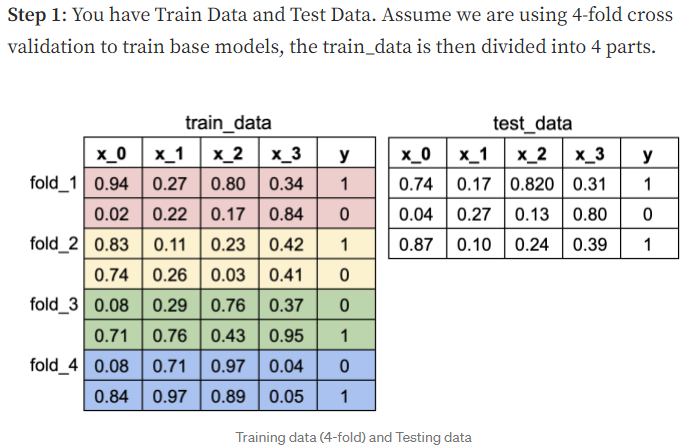

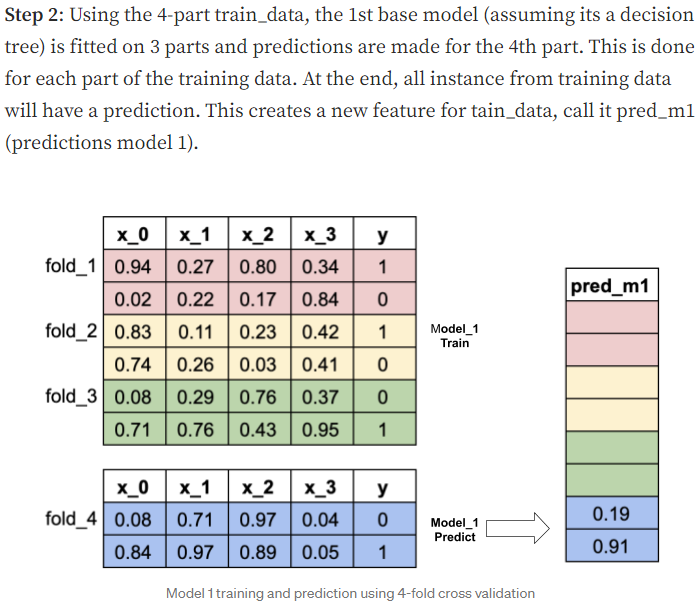

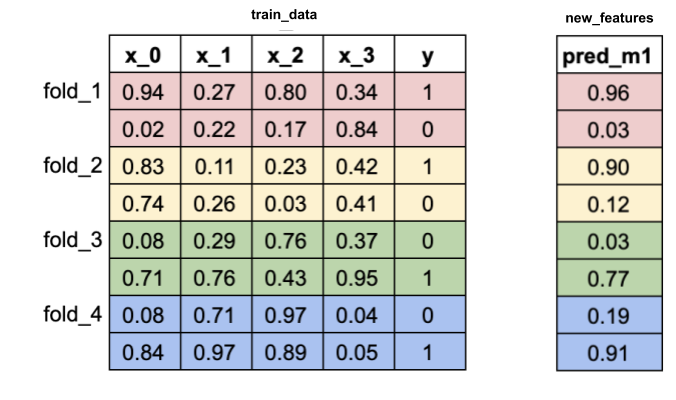

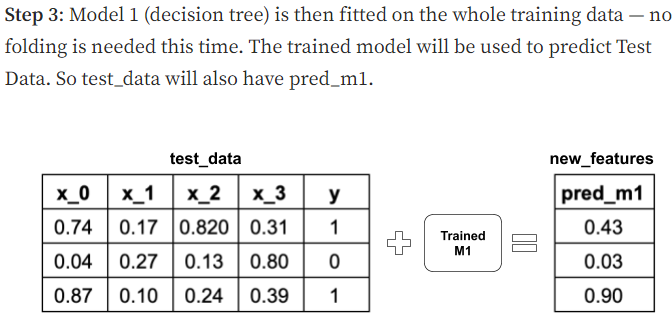

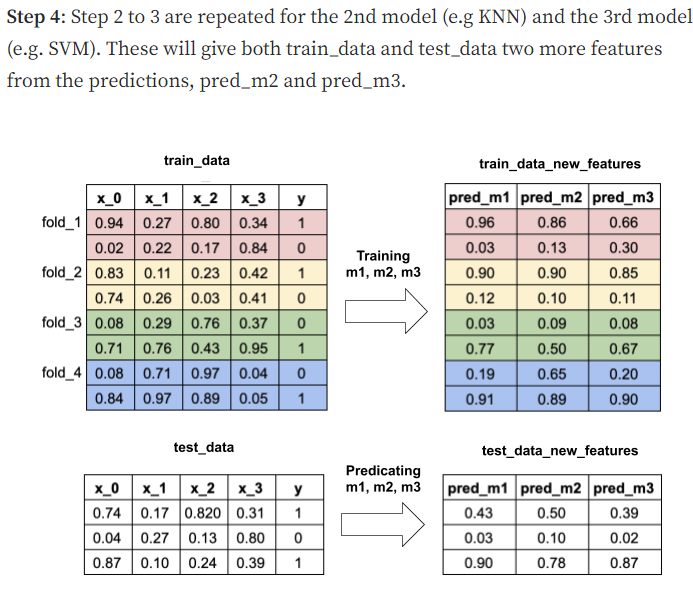

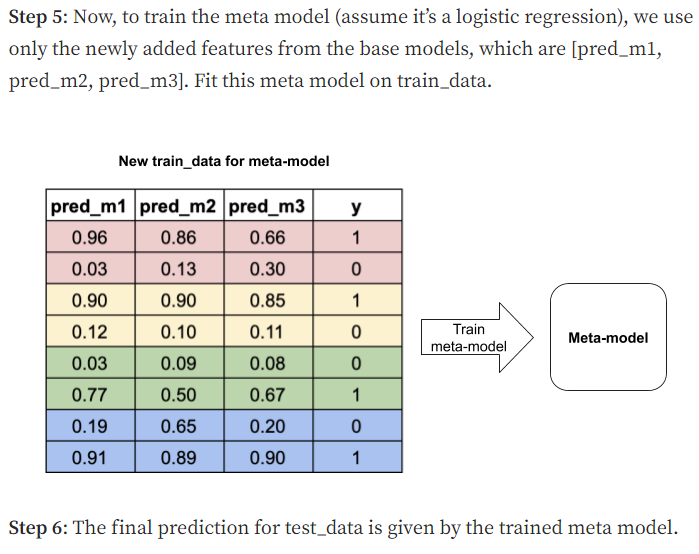

- Code

First, define a function to do stacking based on input model. This function will use n_fold cross validation to train the input model, and return the predictions on train_data and test_data, which is used as new features.

In [ ]:
def Stacking(model,train,y,test,n_fold):
  folds=StratifiedKFold(n_splits=n_fold,random_state=1)
  test_pred=np.empty((test.shape[0],1),float)
  train_pred=np.empty((0,1),float)
  
  for train_indices,val_indices in folds.split(train,y.values):
    x_train,x_val=train.iloc[train_indices],train.iloc[val_indices]
    y_train,y_val=y.iloc[train_indices],y.iloc[val_indices]
    model.fit(X=x_train,y=y_train)
    train_pred=np.append(train_pred,model.predict(x_val))
    test_pred=np.append(test_pred,model.predict(test))
    
  return test_pred.reshape(-1,1),train_pred

Next, we train two more base models using the defined function. We use Decision Tree and KNN as examples here.

In [ ]:
# initialise the base models
model_1 = tree.DecisionTreeClassifier(random_state=1)
model_2 = KNeighborsClassifier()

# train base models and create new featurs
test_pred_1 ,train_pred_1=Stacking(model=model_1,n_fold=10, train=x_train,test=x_test,y=y_train)
test_pred_2 ,train_pred_2=Stacking(model=model_2,n_fold=10,train=x_train,test=x_test,y=y_train)

# convert into dataframe for later use
train_pred_1=pd.DataFrame(train_pred_1)
test_pred_1=pd.DataFrame(test_pred_1)
train_pred_2=pd.DataFrame(train_pred_2)
test_pred_2=pd.DataFrame(test_pred_2)

Finally, we create a meta-model, logistic regression, by using the predictions from base models (new feature), to give final prediction.

In [ ]:
df = pd.concat([train_pred_1, train_pred_2], axis=1)
df_test = pd.concat([test_pred_1, test_pred_2], axis=1)

model = LogisticRegression(random_state=1)
model.fit(df,y_train)
model.score(df_test, y_test)

### Blending


Blending is very similar to Stacking. It also uses base models to provide base predictions as new features and a new meta model is trained on the new features that gives the final prediction. The only difference is that training of the meta-model is applied on a separate holdout set (e.g 10% of train_data)rather on full and folded training set.

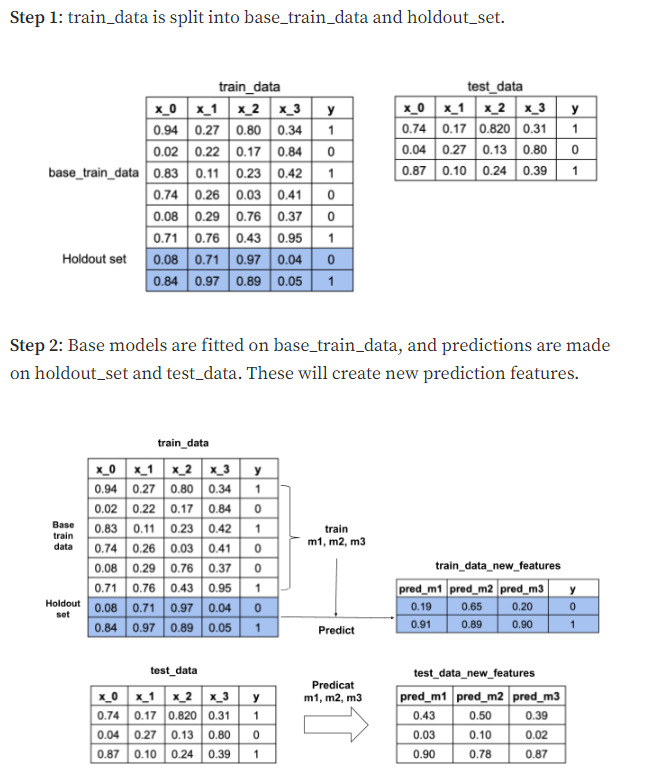

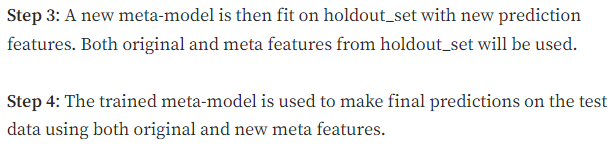

- Code

Two base models, Decision Tree and KNN, will be trained on the base train data and make predictions on the holdout_set and test_data.

In [ ]:

model_1 = tree.DecisionTreeClassifier()
model_1.fit(x_train, y_train)
holdout_pred_1=model_1.predict(x_val)
test_pred_1=model_1.predict(x_test)
holdout_pred_1=pd.DataFrame(holdout_pred_1)
test_pred1=pd.DataFrame(test_pred1)

model_2 = KNeighborsClassifier()
model_2.fit(x_train,y_train)
holdout_pred_2=model_2.predict(x_val)
test_pred_2=model_2.predict(x_test)
holdout_pred_2=pd.DataFrame(holdout_pred_2)
test_pred_2=pd.DataFrame(test_pred_2)

The original and meta features will be combined in holdout set and test_data, and a logistic regression model will be trained and make final predictions on test_data.

In [ ]:
df_holdout=pd.concat([x_val, holdout_pred_1,holdout_pred_2],axis=1)
df_test=pd.concat([x_test, test_pred_1,test_pred_2],axis=1)

model = LogisticRegression()
model.fit(df_holdout,y_holdout)
model.score(df_test,y_test)

## Task 
    
Take any classification dataset and apply above code of stacking and blending on that dataset to generate predictions